# Final Project: DB-SCAN Clustering

### Group 5:
- Diah Ayu Setyaningsih
- I Nyoman Warsana
- Iman Santoso

## Membangkitkan Data

In [1]:
import random
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [3]:
# membangkitkan data kluster dengan diketahui pusat kluster dan sebaran kluster
data = make_blobs(n_samples=30, centers=[[2.8,40,0.75,0.8], [3.7,130,1.5,1.4], [4.8,175,2.6,2.3]], cluster_std = [0.2, 0.3, 0.1], random_state=0)
dataset = data[0]


In [4]:
#mengubah array ke pandas data frame
import pandas as pd
dataset = pd.DataFrame({'Uang Saku':dataset[:,0],'Uang Pakaian':dataset[:,1],'Uang Makan':dataset[:,2], 'Uang Kamar Kos':dataset[:,3]})
dataset

,Uang Saku,Uang Pakaian,Uang Makan,Uang Kamar Kos
0,4.894725,174.984499,2.661408,2.392221
1,4.801050,175.178587,2.612691,2.340199
2,3.098816,39.958968,0.812614,0.629181
3,3.253951,39.709127,0.759152,0.762563
4,4.682688,175.194362,2.558638,2.225255
5,3.215831,129.936178,1.231360,1.516071
6,3.173512,39.804544,0.940018,0.769729
7,4.820827,175.097664,2.635637,2.370657
8,4.988315,174.865224,2.472952,2.396940
9,3.438761,129.826345,1.406534,1.416850


In [5]:
# membulatkan nilai data ke satu desimal terdekat
dataset = dataset.round(1)
dataset

,Uang Saku,Uang Pakaian,Uang Makan,Uang Kamar Kos
0,4.9,175.0,2.7,2.4
1,4.8,175.2,2.6,2.3
2,3.1,40.0,0.8,0.6
3,3.3,39.7,0.8,0.8
4,4.7,175.2,2.6,2.2
5,3.2,129.9,1.2,1.5
6,3.2,39.8,0.9,0.8
7,4.8,175.1,2.6,2.4
8,5.0,174.9,2.5,2.4
9,3.4,129.8,1.4,1.4


In [6]:
dataset.describe()

,Uang Saku,Uang Pakaian,Uang Makan,Uang Kamar Kos
count,30.000000,30.000000,30.000000,30.000000
mean,3.773333,114.976667,1.583333,1.536667
std,0.822080,57.113684,0.794847,0.649925
min,2.300000,39.600000,0.700000,0.600000
25%,3.200000,40.125000,0.900000,0.900000
50%,3.500000,129.900000,1.300000,1.450000
75%,4.700000,175.075000,2.600000,2.275000
max,5.000000,175.200000,2.800000,2.400000


Dari deskriptif statistik di atas dapat dilihat bahwa data yang dibangkitkan memiliki fitur uang saku dengan range 2,3 juta sampai 5 juta. Kemudian uang pakaian memiliki range 39,6 ribu sampai 175,2 ribu, uang makan memiliki range 0,7 juta sampai 2,8 juta, serta uang kamar kos memiliki range 0,6 juta sampai 2,4 juta.

## Data Preprocessing

In [7]:
#standarisasi
from sklearn.preprocessing import StandardScaler
dataset_std = StandardScaler().fit_transform(dataset)

## DB-SCAN Clustering

### 1. Menentukan Nilai Eps

In [8]:
#menghitung jarak 2 titik terdekat
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dataset_std)
distances, indices = nbrs.kneighbors(dataset_std)
distances_1 = distances[:,1]

Text(0.5, 0, 'Jarak antar dua titik terdekat')

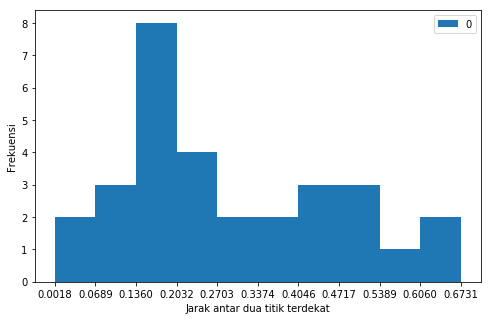

In [10]:
import matplotlib.pyplot as plt

count, bin_edges = np.histogram(distances_1)
distances_1 = pd.DataFrame(distances_1)
distances_1.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.ylabel('Frekuensi')
plt.xlabel('Jarak antar dua titik terdekat')

Dari hasil di atas dapat dilihat bahwa sebagian besar jarak antar dua titik terdekat adalah kurang dari 0,5389 dan ada 3 pasang titik yang memiliki jarak diantara 0,5389 dan 0,6731. Di sini kami menduga bahwa ketiga titik itu adalah outlier/noise. Namun, tidak menutup kemungkinan bahwa tidak terdapat outlier/noise dalam data tersebut. Oleh karena itu, akan dilihat bagaimana hasil clustering untuk eps 0,54 dan 0,68

### 2. Menentukan Nilai MinEps

#### 1) untuk eps = 0,54

In [11]:
from sklearn.neighbors import KDTree
tree = KDTree(dataset_std)
num_neigh_1=tree.query_radius(dataset_std, r=0.54, count_only=True)

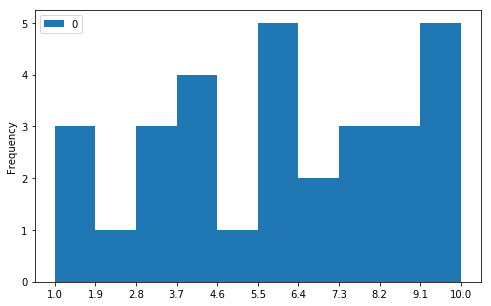

In [12]:
count, bin_edges = np.histogram(num_neigh_1)
num_neigh_1 = pd.DataFrame(num_neigh_1)
num_neigh_1.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

Dari histogram dapat dilihat bahwa untuk eps sebesar 0,54, titik dengan tetangga sebanyak 1 ada 3 titik, kemudian titik dengan tetangga 2  ada 1 titik dan seterusnya relatif semakin meningkat ketika banyaknya tetangga semakin naik sehingga dipilih minpts sebesar 2.

#### 2) untuk eps=0,68

In [13]:
from sklearn.neighbors import KDTree
tree = KDTree(dataset_std)
num_neigh_2=tree.query_radius(dataset_std, r=0.68, count_only=True)

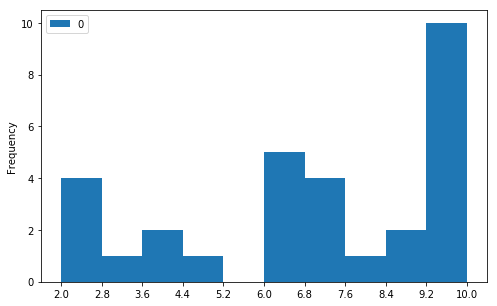

In [14]:
count, bin_edges = np.histogram(num_neigh_2)
num_neigh_2 = pd.DataFrame(num_neigh_2)
num_neigh_2.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

Dari histogram dapat dilihat bahwa untuk eps sebesar 0,68, titik dengan tetangga sebanyak 2 ada 4 titik, kemudian titik dengan tetangga 3 ada 1 titik, kemudian titik dengan tetangga 4 dan 5 masing masing 2 dan 1 titik dan seterusnya relatif meningkat ketika banyaknya tetangga semakin naik sehingga dipilih minpts sebesar 5.

### 3. DBSCAN

#### 1) untuk eps = 0,54 dan minpts = 2

In [15]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps=0.54, min_samples = 2)
clusters_1 = dbscan_1.fit_predict(dataset_std)

#### 2) untuk eps = 0,68 dan minpts = 5

In [16]:
from sklearn.cluster import DBSCAN
dbscan_2 = DBSCAN(eps=0.68, min_samples = 5)
clusters_2 = dbscan_2.fit_predict(dataset_std)

### 4. Evaluasi Model

In [17]:
from sklearn.metrics import silhouette_score

#untuk eps = 0,54 dan minpts = 2
score_model_1 = silhouette_score(dataset_std,clusters_1)
print("Untuk pengklusteran DBSCAN dengan eps sebesar 0,54 dan minpts sebesar 2 diperoleh silhouette score sebesar",
      score_model_1)

#untuk eps = 0,68 dan minpts = 5
score_model_2 = silhouette_score(dataset_std,clusters_2)
print("Untuk pengklusteran DBSCAN dengan eps sebesar 0,68 dan minpts sebesar 5 diperoleh silhouette score sebesar",
      score_model_2)

Untuk pengklusteran DBSCAN dengan eps sebesar 0,54 dan minpts sebesar 2 diperoleh silhouette score sebesar 0.5923198628444298
Untuk pengklusteran DBSCAN dengan eps sebesar 0,68 dan minpts sebesar 5 diperoleh silhouette score sebesar 0.7447687086594996


Dari hasil di atas dapat dilihat bahwa nilai silhouette score untuk pengklusteran DBSCAN dengan eps 0,68 dan minpts 5 lebih baik dari pada pengklusteran DBSCAN dengan eps 0,54 dan minpts 2 sehingga akan digunakan hasil pengklusteran DBSCAN dengan eps 0,68 dan minpts 0,5 tersebut.

## Hasil Kluster

In [18]:
# Banyaknya kluster yang terbentuk
n_clusters = len(set(clusters_2)) - (1 if -1 in clusters_2 else 0)
n_clusters

3

In [19]:
pd.Series(clusters_2).value_counts()

2    10
1    10
0    10
dtype: int64

## Visualisasi

Fitur yang digunakan dalam analisis ini ada sebanyak 4 sehingga agak sulit untuk menggambarkan plotnya. Oleh karena itu, dilakukan PCA sehingga dari 4 fitur tadi dapat diekstrak menjadi 2 fitur untuk memudahkan dalam visualisasi plot.

### 1. PCA

In [20]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
dataset_pca = sklearn_pca.fit_transform(dataset_std)
dataset_pca

array([[ 2.62350065, -0.2397157 ],
       [ 2.42036155, -0.15471478],
       [-2.31574665, -0.43716464],
       [-2.03738827, -0.49096396],
       [ 2.2798638 , -0.12974685],
       [-0.50098455,  0.73859422],
       [-2.0343059 , -0.48806517],
       [ 2.49778416, -0.1219022 ],
       [ 2.55601885, -0.18515713],
       [-0.32697418,  0.47015466],
       [-0.25660684,  0.49909903],
       [ 2.54695707, -0.27124045],
       [-0.12383508,  0.38515373],
       [ 0.01663988, -0.06994639],
       [-2.36228246, -0.28396293],
       [-2.0782046 , -0.33099999],
       [-0.13201782,  0.30035824],
       [-2.1430378 , -0.27579514],
       [-0.28044987,  0.32017014],
       [-2.10994766, -0.08816989],
       [ 2.75097521, -0.35495355],
       [-0.71980672,  0.29932955],
       [-2.6697353 ,  0.01331276],
       [ 2.4364671 , -0.06154606],
       [ 2.43558806, -0.06283389],
       [-0.11652009,  0.9020108 ],
       [ 2.20068312, -0.16513507],
       [-2.53803941, -0.0213162 ],
       [-0.30049405,

### 2. Visualisasi Hasil Kluster

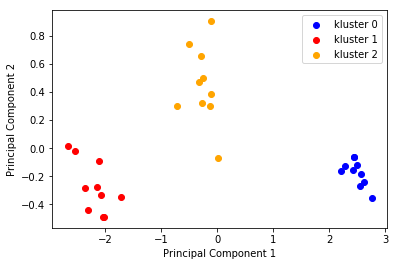

In [21]:
import matplotlib.pyplot as plt
colors = ["blue", "red", "orange"]
target_names = ["kluster 0", "kluster 1", "kluster 2"]

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(dataset_pca[clusters_2==i,0], dataset_pca[clusters_2==i, 1], color=color,
               label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Mengidentifikasi Karakteristik Kluster

### - Untuk Variabel Uang Saku dan Uang Pakaian

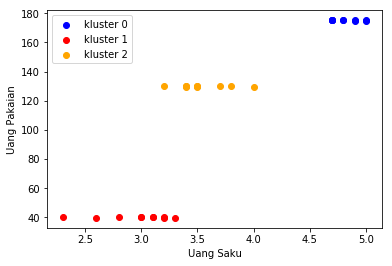

In [22]:
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(dataset.iloc[clusters_2==i,0], dataset.iloc[clusters_2==i, 1], color=color,
               label=target_name)
plt.legend(loc="best")
plt.xlabel('Uang Saku')
plt.ylabel('Uang Pakaian')
plt.show()

Dari plot di atas dapat dilihat bahwa mahasiswa pada kluster 0 memiliki uang saku dan uang pakaian yg relatif lebih tinggi. Kemudian, kluster 1 memiliki uang saku dan uang pakaian yg relatif lebih rendah. Terakhir, mahasiswa pada kluster 2 memiliki uang saku dan uang pakaian yg yang berada di antara kluster 0 dan kluster 1 atau dapat dikatakan sedang.

### - Untuk Variabel Uang Makan dan Uang Kamar Kos

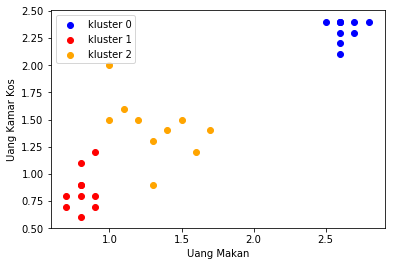

In [23]:
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(dataset.iloc[clusters_2==i,2], dataset.iloc[clusters_2==i, 3], color=color,
               label=target_name)
plt.legend(loc="best")
plt.xlabel('Uang Makan')
plt.ylabel('Uang Kamar Kos')
plt.show()

Dari plot di atas dapat dilihat bahwa mahasiswa pada kluster 0 memiliki uang makan dan uang kamar kos yg relatif lebih tinggi. Kemudian, kluster 1 memiliki uang makan dan uang kamar kos yg relatif lebih rendah. Terakhir, mahasiswa pada kluster 2 memiliki uang makan dan uang kamar kos yg yang berada di antara kluster 0 dan kluster 1 atau dapat dikatakan sedang.

In [24]:
dataset_hasil=dataset.iloc[:]
dataset_hasil["Kluster"]=clusters_2
dataset_hasil

,Uang Saku,Uang Pakaian,Uang Makan,Uang Kamar Kos,Kluster
0,4.9,175.0,2.7,2.4,0
1,4.8,175.2,2.6,2.3,0
2,3.1,40.0,0.8,0.6,1
3,3.3,39.7,0.8,0.8,1
4,4.7,175.2,2.6,2.2,0
5,3.2,129.9,1.2,1.5,2
6,3.2,39.8,0.9,0.8,1
7,4.8,175.1,2.6,2.4,0
8,5.0,174.9,2.5,2.4,0
9,3.4,129.8,1.4,1.4,2


**Keterangan:**
- Kluster 0 = tingkat keborosan tinggi
- Kluster 1 = tingkat keborosan rendah
- Kluster 2 = tingkat keborosan sedang